In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
path = "https://raw.githubusercontent.com/Mondol007/Datasets/main/Breast_cancer_data.csv"
dataset = pd.read_csv(path)
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
dataset.shape

(569, 6)

<Axes: >

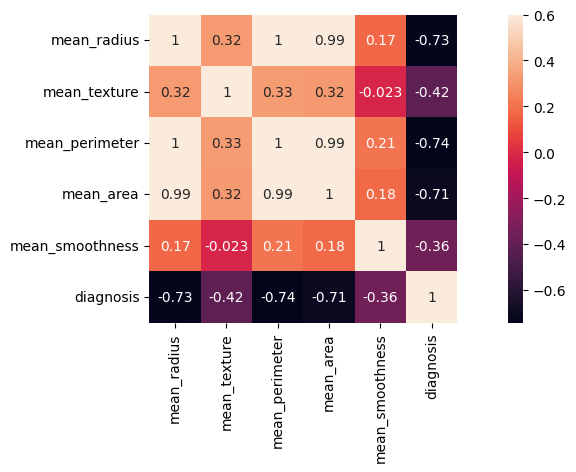

In [ ]:
#Correlation Matrix

plt.figure(figsize=(13,4))
sns.heatmap(dataset.corr(), vmax=0.6, square=True, annot=True)

In [ ]:
dataset.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [ ]:
train, test = train_test_split(dataset, test_size=.2, random_state=41)
X_train = train.iloc[:,:-1].values
Y_train = train.iloc[:,-1].values
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(455, 5)
(455,)
(114, 5)
(114,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Kohonen Network

In [ ]:
class KohonenSOM:
    def __init__(self, input_size, map_size):
        self.weights = np.random.rand(map_size[0], map_size[1], input_size)
        self.map_size = map_size

    def euclidean_distance(self, x, y):
        return np.sqrt(np.sum((x - y) ** 2))

    def update_weights(self, input_vector, winner, learning_rate, neighborhood_radius):
        for i in range(self.map_size[0]):
            for j in range(self.map_size[1]):
                distance = self.euclidean_distance(np.array([i, j]), winner)
                if distance <= neighborhood_radius:
                    self.weights[i, j, :] += learning_rate * (input_vector - self.weights[i, j, :])

    def train(self, data, epochs, initial_learning_rate, initial_radius):
        for epoch in range(epochs):
            for input_vector in data:
                # Find the winner neuron (best matching unit)
                winner = np.unravel_index(np.argmin(np.sum((self.weights - input_vector) ** 2, axis=2)), self.map_size)

                # Update weights based on the winner
                learning_rate = initial_learning_rate * np.exp(-epoch / epochs)
                neighborhood_radius = initial_radius * np.exp(-epoch / epochs)
                self.update_weights(input_vector, winner, learning_rate, neighborhood_radius)

    def predict(self, input_vector):
        winner = np.unravel_index(np.argmin(np.sum((self.weights - input_vector) ** 2, axis=2)), self.map_size)
        return winner

    def visualize(self, data,y):
        plt.figure()
        plt.scatter(data[:, 0], data[:, 1], c=y, label='Input Data')

        for i in range(self.map_size[0]):
            for j in range(self.map_size[1]):
                plt.scatter(self.weights[i, j, 0], self.weights[i, j, 1], c='red', marker='x', s=300)

        plt.title('Kohonen SOM')
        plt.legend()
        plt.show()

In [ ]:
data = X_train

som = KohonenSOM(input_size=5, map_size=(3, 2))
som.train(data, epochs=200, initial_learning_rate=0.001, initial_radius=1.0)

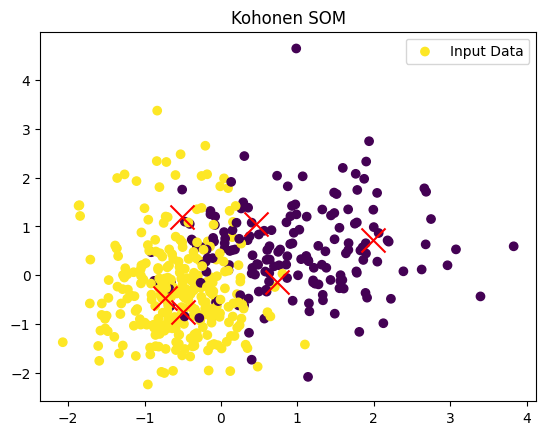

In [ ]:
som.visualize(data,Y_train)

In [ ]:
predicted_labels = [som.predict(x)[0] for x in X_test]
accuracy = accuracy_score(Y_test, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5439


In [ ]:
#cnf_matrix = confusion_matrix(Y_test, predicted_labels)

In [ ]:
#cnf_matrix

### Hopfield Network

In [ ]:
class HopfieldNetwork:
    def __init__(self, size):
        self.weights = np.zeros((size, size))
        self.coun = 0

    def train(self, patterns):
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
            np.fill_diagonal(self.weights, 0)

    def predict(self, input_pattern, max_iterations=50):

        for _ in range(max_iterations):
            output = np.sign(np.dot(self.weights, input_pattern))
            if np.array_equal(input_pattern, output):
              self.coun = self.coun + 1
              break
            input_pattern = output
        return output
    def getCountValue(self):
      return self.coun

In [ ]:
def test_hopfield_network(X_train, y_train, X_test, y_test):

    hopfield = HopfieldNetwork(size=X_train.shape[1])
    hopfield.train(X_train)


    predictions = np.array([hopfield.predict(x) for x in X_test])
    c = hopfield.getCountValue()


    accuracy = c/len(y_test)
    print(f'accuracy: {accuracy}')

In [ ]:
p = test_hopfield_network(X_train, Y_train, X_test, Y_test)

accuracy: 0.9824561403508771
